<a href="https://colab.research.google.com/github/Dain777666/ESAA_25-2/blob/main/OB_WEEK2_FRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 7.5 부스팅

- 부스팅: 약한 학습기를 여러 개 연결하여 강한 학습기를 만드는 앙상블 방법

- 앞의 모델을 보완해가면서 일련의 예측기를 학습시키는 것 -> 이전 모델이 과소적합했던 훈련 샘플의 가중치를 더 높이는 것

### 7.5.1 에이다부스트

- 핵심 아이디어: 이전 모델이 잘못 예측한 데이터에 가중치를 부여하여 다음 모델이 더 집중적으로 학습하도록 만드는 것

- 에러율: 현재 m번째 약한 학습기가 얼마나 데이터를 잘 분류하지 못했는지를 나타내는 가중치가 적용된 지표

- 예측기 가중치: 예측기 가중치는 m번째 약한 학습기가 최종 예측에 얼마나 큰 영향력을 행사할지를 결정하는 값입니다. 에러율이 낮을수록 높은 가중치를 부여받음

  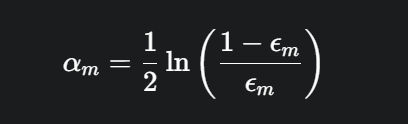

- 만약 모델이 완벽에 가까워 에러율 -> 0 이면, 분모가 0에 가까워지므로 α값은 매우 커짐

- 만약 모델이 무작위 추측 수준이어서 에러율 = 0.5 이면, ln(1)=0 이므로 α = 0 이 됨. (최종 예측에 아무런 영향력을 주지 못함)

- 만약 모델이 0.5보다 성능이 나빠 에러율 -> 1 이면, α값은 음수가 됨

- 가중치 업데이트 규칙: 현재 모델이 잘못 예측한 데이터의 가중치는 높이고, 올바르게 예측한 데이터의 가중치는 낮추는 규칙

  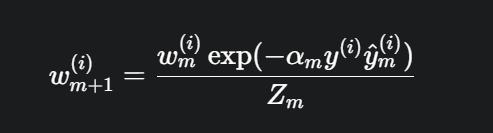

- 정답을 맞춘 경우: 가중치가 exp(−α) 배만큼 감소

- 정답을 틀린 경우: 가중치는 exp(α) 배만큼 증가

- 알고리즘은 지정된 예측기 수에 도달하거나 완벽한 예측기가 만들어지면 중지됨

< 최종 예측 >

- 과정을 M번 반복하여 M개의 약한 학습기와 각각의 가중치를 얻음 -> 가중치 합이 가장 큰 클래스가 예측 결과가 됨







In [1]:
import warnings
warnings.filterwarnings('ignore')

# import package
import numpy as np
import os

# 5장에서의 moons dataset 불러오기
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y = make_moons(n_samples=100, noise=0.15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME", learning_rate=0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

### 7.5.2 그레이디언트 부스팅

- 에이다부스트처럼 반복마다 샘플의 가중치를 수정하는 대신 이전 예측기가 만든 잔여 오차에 새로운 예측기를 학습시킴

- 'learning_rate' 매개변수: 각 트리의 기여 정도를 조절함, 이를 0.1처럼 낮게 설정하면 앙상블을 훈련세트에 학습시키기 위해 많은 트리가 필요하지만 일반적으로 예측의 성능은 좋아짐 -> '축소'라고 부르는 규제 방법

- 최적의 트리 수 -> 조기 종료 기법을 사용하여 찾음

- 최적화된 그레이디언트 부스팅 구현으로 XGBoost 파이썬 라이브러리가 유명함(빠른 속도, 확장성, 이식성)


In [3]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [4]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2)

In [5]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2)

In [6]:
#y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [7]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
best_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=np.int64(113))

In [9]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)
# warm_start = True로 설정하면,
# 사이킷런 fit() 메서드가 호출될 때 기존 트리를 유지하고 훈련을 추가할 수 있도록 해줌

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break # 조기 종료


In [10]:
import xgboost

xgb_reg = xgboost.XGBRegressor(early_stopping_rounds=2)
xgb_reg.fit(X_train, y_train, eval_set = [(X_val, y_val)])
y_pred = xgb_reg.predict(X_val)

[0]	validation_0-rmse:0.40997
[1]	validation_0-rmse:0.36656
[2]	validation_0-rmse:0.34947
[3]	validation_0-rmse:0.34016
[4]	validation_0-rmse:0.34230
[5]	validation_0-rmse:0.34301


### 7.6 스태킹

- 마지막 예측기를 블렌더 또는 메타 학습기라고 부름

- 블렌더를 학습시키는 일반적인 방법은 '홀드 아웃' 세트를 사용하는 것임

< 예측 과정 >

1. 훈련 세트를 두 개의 서브셋으로 나눔 -> 첫 번째 서브셋은 첫 번째 레이어의 예측을 훈련시키기 위해 사용됨

2. 첫 번째 레이어의 예측기를 사용해 두 번째 (홀드 아웃) 세트에 대한 예측을 만듦 -> 홀드 아웃 세트의 각 샘플에 대해 세 개의 예측값이 있음

3. 앞에서 예측한 값을 입력 특성으로 사용하는 새로운 훈련 세트를 만듦(즉, 첫 번째 레이어의 예측을 가지고 타깃값을 예측하도록 학습됨)

- 사이킷런은 스태킹을 직접 지원하지 않음





